On considère un problème d'optimisation qui consiste à minimiser une fonction non linéaire $f$ sur un polyèdre $S$. 

On montre comment utliser la méthode du gradient projeté pour résoudre ce problème. Le polyèdre $S$ est défini par des contraintes d'égalité et d'inégalité, c'est à dire
$$ S= \{x\in R : Ax\leq b,\, Qx=c\} $$
où $A$ et $Q$ sont des matrices et $b$ et $c$ sont des vecteurs.

### Algorithme du gradient projeté 
1. Choisir un point $x_1\in S$, faire $k=1$.
2. À l'itération $k$ on a $x_k$. Déterminer la matrice $A_1$ correspondant au contraintes actives en $x_k$. Soit $M_k$ la matrice définie par 
\begin{equation}
M_k=\left[\begin{array}{c}A_1\\Q\end{array}\right]
\end{equation}
3. Déterminer $d_k$ en procédant comme suit
    * Si la matrice $M_k$ est vide alors 
        * prendre $d_k=-\nabla f(x_k)$
        Si $d_k=0$ alors
            * Stop $x_k$ est un point de KKT.
        * Résoudre le système d'équations $M_k M_k^\top w = - M_k\nabla f(x_k)$. Soit $\tilde w_k=(u_k,v_k)$ la solution.
        * Calculer $d_k=-(\nabla f(x_k)-M_k^\top \tilde d_k)$.
    * Si $d_k=0$ aller à 4) sinon aller à 5),
4. Si $u_k\geqslant 0$ alors on a $x_k$ est un point de KKT. 
Sinon déterminer $j$ tel que $u_j=\min u_k$, éliminer la $j^{\text{ème}}$ ligne de la matrice $A_1$ et appeler cette nouvelle matrice $\hat A_1$. Mettre 
$$M_k=\left[\begin{array}{c}\hat A_1\\Q\end{array}\right]$$
et aller à 3).
5. Déterminer $\alpha_{\text{max}}$ en utilisant la formule
\begin{equation}
\alpha_{\text{max}}=\min \left\{\frac{(b_2-A_2x_k)_i}{(A_2 d_k)_i } : (A_2 d_k)_i>0\right\}
\end{equation}
où $A_2$ est la matrice correspondant aux contraintes non actives et $b_2$ le sous-vecteur de $b$ qui va avec.
6. Déterminer $\alpha_k$ solution du problème d'optimisation unidimensionel suivant
\begin{equation}
\begin{array}{l}
\text{Minimiser }f(x_k+\alpha d_k)\\
\text{s.c}\\
0\leqslant \alpha \leqslant \alpha_{\text{max}}.
\end{array}
\end{equation}
7. Faire $x_{k+1}=x_k+\alpha_k d_k$, $k=k+1$ et aller à 2).

On montre comment utiliser la méthode de Zouteindijk pour résoudre le programme non linéaire suivant

\begin{equation*}
\begin{array}{l}
\text{Minimiser }   3x_1^2+2x_1x_2+2x_2^2-6x_1-9x_2\\[1mm]
-3x_1+6x_2\leqslant 9   \\
-2x_1+\phantom{6}x_2\leqslant 1   \\
x_1,x_2\geqslant 0.
\end{array}
\end{equation*}

In [1]:
using Plots, JuMP, Optim, GLPK, Ipopt, MathOptInterface, LinearAlgebra

┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1664
┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1664


In [2]:
f(x) = 3x[1]^2+2x[1]*x[2]+2x[2]^2-6x[1]-9x[2]

	
df(x) = [6x[1]+2x[2]-6, 4x[2]+2x[1]-9]

	
function g1(x,y)
	return -3x+6y
end
	
function g2(x,y)
	return -2x+y
end

g2 (generic function with 1 method)

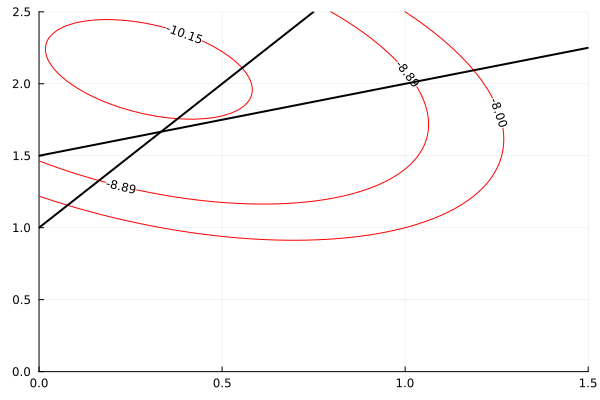

In [3]:
nx = 200
ny = 199
x = range(0,5, length=nx)
y = range(0,5, length=ny)
ff = zeros(nx, ny)

for i in 1:nx
    for j in 1:ny
        ff[i,j] = f([x[i], y[j]])
    end
end


contour(x, y, ff', levels = [-10.15,-8.89, -8], color="red", colorbar = false, contour_labels=true, xlims=(0,1.5), ylims=(0, 2.5))
contour!(x,y,g1, levels=[9], color="black", linewidth=2 )
contour!(x,y, g2, levels=[1], color="black", linewidth=2)

In [4]:
modele = Model(Ipopt.Optimizer)
set_silent(modele)

# définition des variables
@variable(modele, x[1:2] >= 0)

# définition de la fonction objectif
@NLobjective(modele, Min, 3x[1]^2+2x[1]*x[2]+2x[2]^2-6x[1]-9x[2])

# définition des contraintes
@constraint(modele, -3x[1]+6x[2] <= 9)
@constraint(modele, -2x[1]+x[2] <= 1)

# résolution du problème
optimize!(modele);

#affichage de la valeur optimale
@show objective_value(modele)

#affichage de la solution
println("solution = $(value.(x))")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

objective_value(modele) = -10.125000012513723
solution = [0.49999999678061535, 1.7500000109040321]


In [7]:
x0 = [0.0,0.0]
A = [-3 6; -2 1; -1 0; 0 -1]
Q = []
c = []
b = [9, 1, 0, 0];
liste_iteres = [x0]
ρ = 10^-2
iter = 0

0

In [45]:
ind = findall(abs.(A*x0-b) .<= ρ)
println("ind = $ind")
A1 = A[ind, :]
b1 = b[ind]
A2 = A[setdiff(1:4, ind),:]
b2 = b[setdiff(1:4,ind)];

ind = [1]


In [46]:
if Q==[]
    M = A1
else
    M = [A1; Q]
end

1×2 Matrix{Int64}:
 -3  6

In [47]:
if M == []
    global d = -df(x0)
    if abs.(d) <= 0.0001
        return x0
    end
else
    # On résoud le problème MM'd=-M df(x)
    try 
        global w = M*M'\(-M*df(x0))
        global d = -(df(x0)+M'*w) # on calcule d = -(df(x)-M'd)
    catch
        println("le système n'a pas de solution.")
    end
end

2-element Vector{Float64}:
 -5.804639757744923e-8
 -2.9023198733213462e-8

In [48]:
mini, j = findmin(w)

(0.16666666955737963, 1)

In [37]:
# A exécuter si d=0 et il existe j u_j<0
M = M[1:end .!= j, :]

1×2 Matrix{Int64}:
 -3  6

In [44]:
# calcul de alpha_max
hd = A2*d
hb = (b2-A2*x0)[hd .> 0]
hd = hd[hd .> 0]
α_max = hb != [] ? minimum(hb ./ hd) : 100

100

In [40]:
# recherche linéaire
ϕ(t) = f(x0+t*d)
res = Optim.optimize(ϕ, 0, α_max, GoldenSection())
α = Optim.minimizer(res)

0.1388888956072219

In [29]:
x0

2-element Vector{Float64}:
 0.0
 0.9999999814878306

In [41]:
x0 = x0+α*d 
append!(liste_iteres, [x0])
iter += 1

3

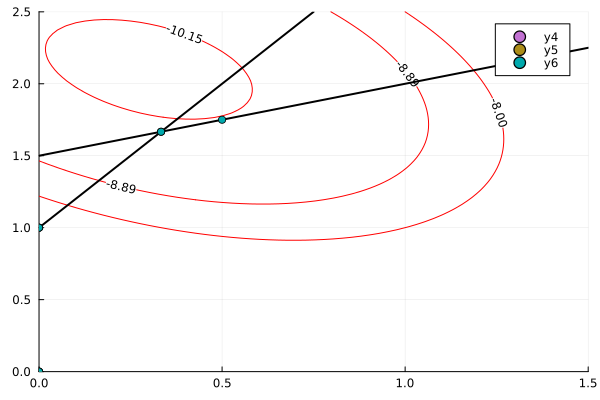

In [42]:
scatter!([liste_iteres[i][1] for i in 1:length(liste_iteres)], [liste_iteres[i][2] for i in 1:length(liste_iteres
        )])

In [43]:
norm(liste_iteres[end]-value.(x))

2.0857594777464073e-8

In [19]:
savefig("out4.pdf")